In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [6]:
from sklearn.datasets import load_digits
datasets=load_digits()
datasets.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
df = pd.DataFrame(datasets['data'], columns=datasets['feature_names'])
df['target'] = datasets['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [15]:
datasets.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
datasets.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

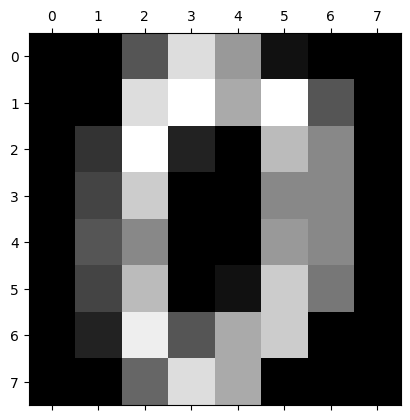

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(datasets.data[0].reshape(8,8))

In [27]:
X = df
y = datasets.target

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -0.5056698 ,
        -0.19600752, -1.56774584],
       [ 0.        , -0.33501649, -1.09493684, ..., -0.5056698 ,
        -0.19600752, -1.21864556],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.6951369 ,
        -0.19600752, -0.86954528],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.5056698 ,
        -0.19600752,  1.22505642],
       [ 0.        , -0.33501649, -0.67419451, ..., -0.5056698 ,
        -0.19600752,  1.5741567 ],
       [ 0.        , -0.33501649,  1.00877481, ..., -0.26113572,
        -0.19600752,  1.22505642]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9861111111111112

In [44]:
y_pred= prediction=model.predict(X_test)

In [45]:
y_pred

array([8, 9, 6, 5, 3, 8, 3, 2, 1, 2, 5, 8, 1, 2, 9, 1, 5, 1, 8, 2, 1, 0,
       5, 0, 3, 5, 4, 1, 0, 5, 2, 5, 8, 7, 5, 8, 3, 2, 9, 4, 9, 0, 5, 3,
       1, 6, 9, 6, 0, 9, 4, 9, 4, 4, 4, 2, 6, 2, 5, 9, 8, 6, 9, 6, 9, 7,
       3, 8, 4, 1, 4, 8, 0, 1, 6, 1, 6, 2, 5, 7, 8, 5, 9, 2, 7, 6, 9, 2,
       4, 5, 5, 8, 8, 0, 1, 2, 5, 4, 1, 2, 7, 8, 6, 8, 1, 0, 6, 0, 1, 0,
       3, 1, 5, 3, 4, 1, 4, 6, 7, 2, 0, 9, 1, 2, 5, 6, 8, 8, 8, 1, 5, 0,
       2, 4, 0, 6, 0, 4, 1, 2, 8, 7, 9, 4, 0, 4, 3, 6, 7, 2, 6, 1, 6, 6,
       7, 2, 1, 3, 4, 0, 9, 7, 2, 2, 0, 7, 4, 7, 6, 8, 5, 6, 0, 1, 1, 1,
       4, 8, 2, 6, 5, 4, 0, 2, 7, 3, 6, 2, 3, 7, 7, 4, 0, 8, 5, 1, 1, 7,
       6, 3, 5, 3, 2, 9, 9, 9, 9, 4, 4, 1, 0, 2, 7, 1, 8, 4, 8, 7, 3, 7,
       0, 6, 8, 7, 3, 1, 3, 3, 7, 1, 3, 0, 3, 6, 4, 9, 0, 9, 6, 2, 2, 0,
       4, 2, 8, 7, 1, 4, 8, 0, 6, 6, 7, 2, 2, 8, 6, 9, 6, 2, 4, 5, 9, 9,
       1, 1, 8, 9, 6, 7, 5, 6, 4, 0, 2, 4, 3, 2, 2, 1, 7, 7, 5, 5, 5, 2,
       5, 8, 8, 4, 6, 9, 9, 2, 1, 3, 5, 7, 1, 0, 7,

In [48]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(y_pred,y_test)
acc

0.9861111111111112

In [50]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(pred,y_test)
acc

0.9861111111111112

In [58]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [59]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        35\n           1       1.00      0.98      0.99        46\n           2       0.98      1.00      0.99        41\n           3       1.00      0.96      0.98        26\n           4       1.00      0.97      0.99        35\n           5       1.00      0.97      0.99        38\n           6       1.00      1.00      1.00        42\n           7       1.00      1.00      1.00        32\n           8       0.97      1.00      0.99        35\n           9       0.91      0.97      0.94        30\n\n    accuracy                           0.99       360\n   macro avg       0.99      0.99      0.99       360\nweighted avg       0.99      0.99      0.99       360\n'

In [60]:
from sklearn.metrics import confusion_matrix



y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [62]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [63]:
pca.explained_variance_ratio_

array([0.14793203, 0.13533877, 0.11736819, 0.08354533, 0.05760242,
       0.04997671, 0.043828  , 0.03644352, 0.03341269, 0.03073511,
       0.02374693, 0.02263179, 0.01818323, 0.01765767, 0.01457881,
       0.01404747, 0.0132791 , 0.01250013, 0.01017906, 0.00899757,
       0.00886366, 0.00811611, 0.00771277, 0.00724598, 0.00702086,
       0.00592083, 0.00572518, 0.00522757, 0.00486257])

In [65]:
pca.n_components_

np.int64(29)

In [66]:
X_pca

array([[ -1.11561689, -21.34068919,   9.36633735, ...,   3.69656406,
          0.66831688,   1.17754561],
       [  7.95481232,  20.661232  ,  -4.77722493, ...,   1.90722887,
          1.18374516,  -2.32086756],
       [  7.01666565,   9.87305262,  -3.19492399, ...,   4.27272598,
         -1.64759955,  -0.90489499],
       ...,
       [ 10.73240501,   7.04862571,  -5.46899338, ...,  -3.30630351,
         -2.23612987,  -3.57405265],
       [ -4.93052351, -12.24961277,  10.47395994, ...,   2.92450014,
          0.46550271,   0.84657812],
       [ -0.36160993,  -6.3284344 , -10.50926251, ...,  -2.84508498,
         -1.45065928,  -2.62912422]])

In [67]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975

In [71]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_pca)

conf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [73]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        35\n           1       0.98      0.93      0.96        46\n           2       0.98      1.00      0.99        41\n           3       0.92      0.92      0.92        26\n           4       1.00      0.94      0.97        35\n           5       1.00      0.97      0.99        38\n           6       1.00      1.00      1.00        42\n           7       1.00      1.00      1.00        32\n           8       0.95      1.00      0.97        35\n           9       0.91      0.97      0.94        30\n\n    accuracy                           0.97       360\n   macro avg       0.97      0.97      0.97       360\nweighted avg       0.98      0.97      0.98       360\n'

In [74]:
accuracy

0.975

In [75]:
conf_matrix

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 24,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 29]])

In [76]:
pca.explained_variance_ratio_

array([0.14793203, 0.13533877, 0.11736819, 0.08354533, 0.05760242,
       0.04997671, 0.043828  , 0.03644352, 0.03341269, 0.03073511,
       0.02374693, 0.02263179, 0.01818323, 0.01765767, 0.01457881,
       0.01404747, 0.0132791 , 0.01250013, 0.01017906, 0.00899757,
       0.00886366, 0.00811611, 0.00771277, 0.00724598, 0.00702086,
       0.00592083, 0.00572518, 0.00522757, 0.00486257])

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [82]:
X_pca

array([[ -1.11561689, -21.34068919],
       [  7.95481232,  20.661232  ],
       [  7.01666565,   9.87305262],
       ...,
       [ 10.73240501,   7.04862571],
       [ -4.93052351, -12.24961277],
       [ -0.36160993,  -6.3284344 ]])

In [83]:
pca.explained_variance_ratio_

array([0.14793203, 0.13533877])

In [84]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333